In [1]:
# Stanford dataset
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

data = open('web-stanford.txt', 'r')

edge_list = np.empty((2312497, 2),dtype=int)

row = np.empty(2312497,dtype=int)
col = np.empty(2312497,dtype=int)
m_data = np.empty(2312497,dtype=int)

In [2]:

# Stanford dataset
# Reading data and creating edge list
a = True
i = 0
while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] != '#':
        t = data_line.split()
        edge_list[i][0] = int(t[0])
        edge_list[i][1] = int(t[1])
        i = i + 1


eof


In [3]:
print(np.shape(col))
print(np.shape(row))
print(np.shape(m_data))
print(np.shape(edge_list))

(2312497,)
(2312497,)
(2312497,)
(2312497, 2)


In [4]:
# Creating sparse link matrix, binary
for i in range(len(edge_list)):
    col[i] = edge_list[i][0]
    row[i] = edge_list[i][1]
    m_data[i] = 1


print(row.max())
print(col.max())


281903
281903


In [5]:
Q = csr_matrix((m_data, (row, col)), shape=(281904, 281904))

In [6]:
c_sum=Q.sum(axis=0)
csr_sum=csr_matrix(c_sum, dtype=float)
for x in range(len(csr_sum.data)):
        csr_sum.data[x]=1/csr_sum.data[x]


In [7]:
Q=Q.multiply(csr_sum)

In [38]:
epsilon = 10e-5
residual = 1
z = np.ones(Q.shape[1]) / (Q.shape[1])
v = np.ones(Q.shape[1]) / (Q.shape[1])
print(z.shape)
print(z.T.shape)
alpha = 0.85
res = 1
residuals = []

(281904,)
(281904,)


In [39]:
while res > epsilon:
    # yhat=csr_matrix.dot(Q, z)
    yhat = alpha* Q * z
    # yhat = csr_matrix.multiply(Q, z)
    beta = 1 - np.linalg.norm(yhat, ord=1)
    y = yhat + beta * v
    res = np.linalg.norm(y - z, ord=1)
    z=y
    residuals.append(res)
    print('Residual=', res)




Residual= 0.9577295544927389
Residual= 0.4923468518786388
Residual= 0.24366518783023308
Residual= 0.12526415496508927
Residual= 0.07261689776274378
Residual= 0.04694580907144226
Residual= 0.03270986080137233
Residual= 0.023584800220310963
Residual= 0.017568927294764797
Residual= 0.01356051441279009
Residual= 0.010629892787763143
Residual= 0.00842533184247187
Residual= 0.006748200807866622
Residual= 0.005455691280876991
Residual= 0.004429414103712511
Residual= 0.00361577746394771
Residual= 0.0029605102157840906
Residual= 0.002433891331797664
Residual= 0.002005344824441268
Residual= 0.0016568890562216026
Residual= 0.0013713631341083206
Residual= 0.0011374644746447473
Residual= 0.0009445515771006008
Residual= 0.0007857322210175351
Residual= 0.0006540804179506892
Residual= 0.0005454872085595185
Residual= 0.0004552441899746942
Residual= 0.00038050114849983726
Residual= 0.0003181638864506839
Residual= 0.00026633410760418475
Residual= 0.00022298070218574944
Residual= 0.00018686497274748878
Re

(281904,)
(281904,)


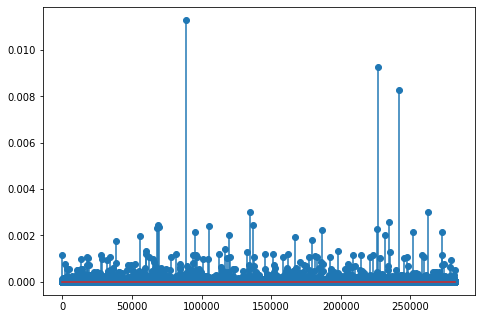

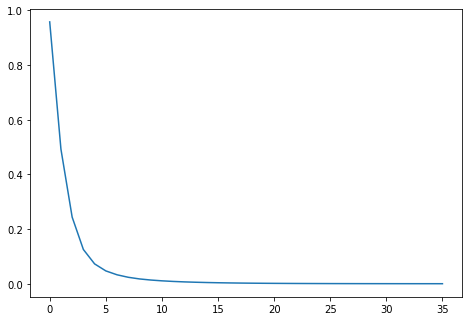

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = np.arange(len(z))
y = z
print(x.shape)
print(y.shape)
ax.stem(x,y)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
x2 = np.arange(36)
y2 = residuals
ax2.plot(x2,y2)
plt.show()


In [10]:
Au=csr_matrix.dot(csr_matrix.transpose(Q),Q)
Hu=csr_matrix.dot(Q,csr_matrix.transpose(Q))
a=np.ones(Q.shape[0])
h=np.ones(Q.shape[0])
print(a,h)
for j in range(5):
    a=csr_matrix.dot(a,Au)
    a=a/sum(a)
    h=csr_matrix.dot(h,Hu)
    h=h/sum(h)
    print(a,h)

MemoryError: Unable to allocate 18.6 GiB for an array with shape (2499486549,) and data type float64